<a href="https://colab.research.google.com/github/Affog7/ASKi/blob/main/notebooks/animeGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive, output
import torch
dv = torch.cuda.get_device_name(0)
print(dv)

drive.mount('/content/drive', force_remount=False)
repo = "Pytorch-animeGAN"
%cd "/content"
!rm -rf {repo}
!git clone https://github.com/ptran1203/{repo}
%cd {repo}
output.clear()

In [2]:
import os
import urllib

data_path = 'anime-gan.zip'
dataset_url = 'https://github.com/ptran1203/pytorch-animeGAN/releases/download/v1.0/dataset_v1.zip'

if not os.path.exists("/content/dataset"):
    !wget -O {data_path} {dataset_url}
    !unzip {data_path} -d /content
    !rm {data_path}

    if not os.path.exists("/content/dataset"):
        raise ValueError(f"Download Failed, {data_path}")

output.clear()

In [3]:
working_dir = '/content/drive/MyDrive/animeGAN'
print(f"You're running on {dv}")

You're running on Tesla T4


In [ ]:
!python3 train.py --real_image_dir '/content/dataset/train_photo'\
                  --anime_image_dir '/content/dataset/Hayao'\
                  --batch 8\
                  --model v2\
                  --amp --cache\
                  --init_epochs 10\
                  --exp_dir {working_dir}\
                  --gan_loss lsgan\
                  --init_lr 0.0001\
                  --lr_g 0.00002\
                  --lr_d 0.00004\
                  --wadvd 300.0\
                  --wadvg 300.0\
                  --wcon 1.5\
                  --wgra 3.0\
                  --wcol 70.0\
                  --use_sn

In [5]:
!pip install color_transfer

  Preparing metadata (setup.py) ... done
  Created wheel for color_transfer: filename=color_transfer-0.1-py3-none-any.whl size=2363 sha256=0d60dc0f66e5f32a48a75a6bd004629d3b0db668c0a73985e055a636b7172818
  Stored in directory: /root/.cache/pip/wheels/c2/84/dd/ae70281354692167c0f4bdd4a231c1b681fb4354124bb7f99d
Successfully built color_transfer


In [7]:
from inference import Predictor
predictor = Predictor("/content/drive/MyDrive/animeGAN_train_photo_Hayao/GeneratorV2_train_photo_Hayao.pt")

Use GPU Tesla T4


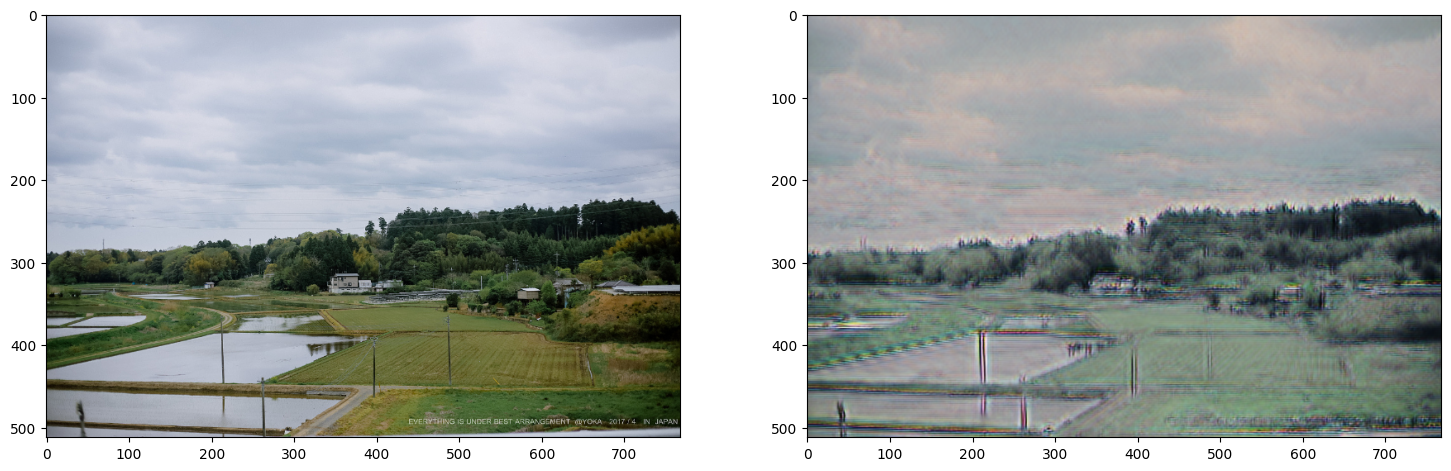

In [12]:
import cv2
import random
import matplotlib.pyplot as plt
import numpy as np

def random_img(img_dir):
    p = os.path.join(img_dir, random.choice(os.listdir(img_dir)))
    return cv2.imread(p)[:, :, ::-1]

image = random_img('/content/dataset/test/HR_photo')
image = cv2.resize(image, (768, 512))

anime_img = (predictor.transform(image) + 1)

fig = plt.figure(figsize=(18, 25))
fig.add_subplot(1, 2, 1)
plt.imshow(image)
fig.add_subplot(1, 2, 2)
plt.imshow(anime_img[0])
plt.show()

Inference Image

In [21]:
!python3 inference_image.py --checkpoint /content/drive/MyDrive/animeGAN_train_photo_Hayao/GeneratorV2_train_photo_Hayao.pt\
                            --src /content/dataset/test/HR_photo\
                            --dest inference_shinkai

Use GPU Tesla T4
Found 45 images in /content/dataset/test/HR_photo
1 (54) (832, 1280, 3): 100% 45/45 [00:35<00:00,  1.27it/s]
Processed in 35.488s


Inference video

In [22]:
!python3 inference_video.py --checkpoint /content/drive/MyDrive/animeGAN_train_photo_Hayao/GeneratorV2_train_photo_Hayao.pt\
                            --src /content/dataset/test/Video/giphy.mp4\
                            --dest /content/dataset/test/Video/test_vid_3_anime.mp4\
                            --batch-size 2

Use GPU Tesla T4
Transfroming video /content/dataset/test/Video/giphy.mp4, 80 frames, size: [480, 270]
100% 80/80 [00:05<00:00, 13.76it/s]
Animation video saved to /content/dataset/test/Video/test_vid_3_anime.mp4
